In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dirty_RGM = r'Regulations_Control_Altona.csv'
dirty_regulations = r'FullTable_Control.csv'
parent_child_relationship = pd.read_csv(dirty_RGM)
gene_intensities_data = pd.read_csv(dirty_regulations)

In [3]:
parent_child_relationship.head()

,condition,target,regulator,timelapse,regulation,BDei
0,Control,Glyma.01G036700.1_S182_1,Glyma.07G072100.1_T24_1,tl.0,dephosphorylation,5.140000e-19
1,Control,Glyma.01G036700.1_S182_1,Glyma.10G173000.1_S334_1,tl.0,dephosphorylation,5.140000e-19
2,Control,Glyma.01G036700.1_S182_1,Glyma.13G161700.1_S197_1,tl.0,dephosphorylation,5.140000e-19
3,Control,Glyma.01G036700.1_S182_1,Glyma.15G074900.1_S59_1,tl.0,dephosphorylation,5.140000e-19
4,Control,Glyma.01G036700.1_S182_1,Glyma.20G070700.1_S570_1,tl.0,dephosphorylation,5.140000e-19


In [4]:
gene_intensities_data.head(10)

,Peptide,condition,0min_1,0min_2,0min_3,0min_4,12min_1,12min_2,12min_3,12min_4,...,54min_3,54min_4,60min_1,60min_2,60min_3,60min_4,6min_1,6min_2,6min_3,6min_4
0,Glyma.01G008500.1_S18_1,Control,27.978798,26.233304,27.738086,0.000000,27.170568,26.319080,28.001693,0.000000,...,28.272709,0.000000,27.105128,25.173817,28.159411,0.000000,26.554184,27.034947,27.496604,0.000000
1,Glyma.01G015500.1_S257_1,Control,29.413583,28.857380,29.328198,28.989568,29.169865,28.766779,29.134507,29.273773,...,28.451130,28.467813,29.230017,29.149490,28.562085,28.911872,29.152332,28.922117,28.961874,29.051035
2,Glyma.01G016500.1_S641_1,Control,23.309034,23.628448,23.078992,23.466394,23.278827,23.065189,22.783278,22.781563,...,23.552530,23.700760,23.405401,23.483395,23.339398,23.867255,22.869155,22.734797,22.832231,22.920487
3,Glyma.01G019200.1_T61_1,Control,0.000000,0.000000,0.000000,0.000000,0.000000,21.682372,0.000000,0.000000,...,0.000000,0.000000,23.675289,0.000000,23.443930,22.865238,0.000000,0.000000,0.000000,0.000000
4,Glyma.01G036700.1_S182_1,Control,26.364315,24.161291,24.656320,24.805185,25.378857,24.416603,24.767025,25.373129,...,24.726381,25.208733,25.319279,23.223341,24.734539,25.025861,25.818412,24.840494,24.984761,25.561010
5,Glyma.01G062100.1_S61_1,Control,25.652637,26.270337,26.799428,26.015492,25.538494,26.119031,26.521448,26.226408,...,24.956568,25.188833,25.779199,26.302573,25.715492,25.675494,25.909699,26.687305,26.557891,26.335563
6,Glyma.01G087900.1_S556_1,Control,23.880920,24.998721,24.270895,23.174080,23.517058,24.428413,24.002197,22.525186,...,22.689177,22.977973,22.282037,22.180828,22.779024,22.314152,24.059448,25.217157,24.213466,23.177258
7,Glyma.01G089300.1_S512_1,Control,23.583581,25.535257,25.904283,24.624633,23.763445,25.464338,25.506311,19.950033,...,25.324421,25.156956,21.526567,23.929239,25.472880,24.770100,22.635546,26.000629,25.862293,24.921851
8,Glyma.01G115900.1_T111_1,Control,28.145840,20.601280,28.025258,27.027255,27.270963,28.238696,27.643156,26.835298,...,27.594413,27.334931,28.191205,27.908380,27.212395,27.460757,28.294693,28.204008,27.982022,27.744697
9,Glyma.01G115900.1_T113_1,Control,28.145840,26.824970,28.025258,0.000000,27.270963,28.238696,27.643156,0.000000,...,27.594413,0.000000,28.191205,27.908380,27.212395,0.000000,28.294693,28.204008,27.982022,0.000000


In [20]:
parent = parent_child_relationship['regulator']
print(len(parent.unique()))
parent = np.asarray(parent)
child = parent_child_relationship['target']
child = np.asarray(child)

7


In [7]:
len(parent)

319

In [10]:
len(child)

319

In [12]:
unique = gene_intensities_data['Peptide'].unique()
len(unique)

372

In [13]:
significant_genes = unique

In [14]:
gene_regulator_matrix = np.zeros((len(significant_genes),len(significant_genes)))

In [15]:
for index in range(len(parent)):
    
    parent_index = np.where(significant_genes == parent[index])[0][0]
    child_index = np.where(significant_genes == child[index])[0][0]
    gene_regulator_matrix[parent_index][child_index] = 1

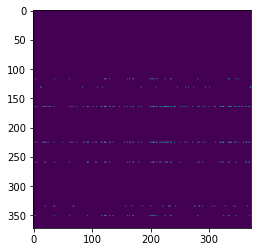

In [18]:
plt.imshow(gene_regulator_matrix)

In [22]:
np.max(gene_regulator_matrix)

1.0

In [ ]:
np.save("soyBeanRGM", gene_regulator_matrix)

# Crap

In [9]:
significant_genes = gene_intensities_data['UniqueID']

KeyError: 'UniqueID'

In [9]:
significant_genes.head()

0      AT2G33830.1_S45_2
1     AT3G28690.1_S352_1
2     AT1G72390.2_S547_1
3    AT1G79280.1_S1666_1
4     AT4G15545.1_S171_2
Name: UniqueID, dtype: object

In [10]:
significant_genes = np.asarray(significant_genes)

In [11]:
significant_genes

array(['AT2G33830.1_S45_2', 'AT3G28690.1_S352_1', 'AT1G72390.2_S547_1',
       'AT1G79280.1_S1666_1', 'AT4G15545.1_S171_2', 'AT4G15545.1_S174_2',
       'AT1G64500.1_S113_2', 'AT1G64500.1_S115_2', 'AT4G24630.1_S383_1',
       'AT1G13020.1_S436_1', 'AT1G78230.1_S223_1', 'AT3G04740.1_S819_1',
       'AT3G27350.1_S22_2', 'AT3G62700.1_S894_2', 'AT3G62700.1_S897_2',
       'AT4G10120.3_S758_1', 'AT4G36980.2_S361_3', 'AT4G36980.2_S373_3',
       'AT5G54900.1_S332_1', 'AT1G79090.3_S114_2', 'AT1G79090.3_S117_2',
       'AT1G79090.3_S83_1', 'AT2G26350.3_S86_1', 'AT2G32240.1_S801_1',
       'AT3G11450.1_T61_1', 'AT1G22310.2_S103_1', 'AT5G03280.1_S731_1',
       'AT2G20960.4_T368_1', 'AT3G13990.2_S496_1', 'AT4G35240.4_S691_1',
       'AT1G27030.1_S11_1', 'AT1G70100.5_S46_1', 'AT1G79090.3_S114_1',
       'AT1G80180.1_S10_1', 'AT3G13300.3_S88_2', 'AT3G13300.3_S98_2',
       'AT3G46530.1_S156_1', 'AT3G46780.1_T410_1', 'AT4G02940.1_S447_2',
       'AT4G02940.1_S451_2', 'AT4G12770.1_S162_1', 'AT4G3697

In [12]:
len(significant_genes)

241

In [24]:
gene_regulator_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [27]:
#np.savetxt("../experiments/gene-regulator-matrix.csv", gene_regulator_matrix, fmt = "%d")